In [1]:
#Importing all the required libraries
import librosa
import keras
import pandas as pd
import numpy as np
import os
from PIL import Image
import pathlib
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.models import Sequential
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

Using TensorFlow backend.


In [4]:
# Code to generate Spectogram Image data out of audio files
# Don't run if Image data already generated
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'D:/AA Desktop/Stuff/Main Stuff/DL/Music_Genre_Classification_2/img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'D:/AA Desktop/Stuff/Main Stuff/DL/Music_Genre_Classification_2/genres_original/{g}'):
        songname = f'D:/AA Desktop/Stuff/Main Stuff/DL/Music_Genre_Classification_2/genres_original/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'D:/AA Desktop/Stuff/Main Stuff/DL/Music_Genre_Classification_2/img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 576x576 with 0 Axes>

In [2]:
# Data Directory and Image Size
data = np.load('D:/AA Desktop/Stuff/Main Stuff/DL/Music_Genre_Classification_2/img_data/data.npy', allow_pickle=True)
IMG_SIZE = 256

In [3]:
# Initializing a Sequential Model
model = Sequential()

In [4]:
#Adding layers to the model
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)      

In [6]:
X = np.array([i[0] for i in data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array([i[1] for i in data])

In [7]:
# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
# Training the model
history=model.fit(X, y, validation_split=0.1, epochs=10, verbose=1, shuffle=1)

Train on 899 samples, validate on 100 samples
Epoch 1/10
899/899 [==============================] - 11s 13ms/step - loss: 11.0644 - accuracy: 0.0968 - val_loss: 2.3009 - val_accuracy: 0.1000
Epoch 2/10
899/899 [==============================] - 5s 6ms/step - loss: 2.3112 - accuracy: 0.1101 - val_loss: 2.3066 - val_accuracy: 0.1000
Epoch 3/10
899/899 [==============================] - 5s 6ms/step - loss: 2.3083 - accuracy: 0.0890 - val_loss: 2.3021 - val_accuracy: 0.1300
Epoch 4/10
899/899 [==============================] - 5s 6ms/step - loss: 2.3041 - accuracy: 0.0957 - val_loss: 2.3025 - val_accuracy: 0.0800
Epoch 5/10
899/899 [==============================] - 5s 6ms/step - loss: 2.2950 - accuracy: 0.1135 - val_loss: 2.3163 - val_accuracy: 0.1000
Epoch 6/10
899/899 [==============================] - 5s 6ms/step - loss: 2.2658 - accuracy: 0.1290 - val_loss: 2.3032 - val_accuracy: 0.0700
Epoch 7/10
899/899 [==============================] - 5s 6ms/step - loss: 2.3113 - accuracy: 0.0945

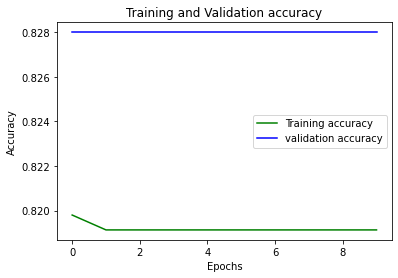

In [9]:
# Plotting model loss
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,10)
plt.plot(epochs, loss_train[0:10], 'g', label='Training accuracy')
plt.plot(epochs, loss_val[0:10], 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

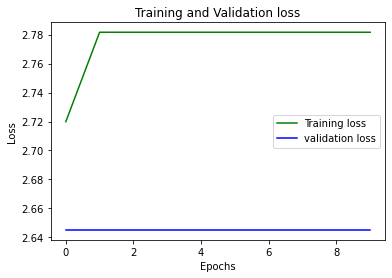

In [10]:
# Plotting model accuracy
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,10)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# Saving the model
model.save('D:/AA Desktop/Stuff/Main Stuff/DL/Music_Genre_Classification_2/Music_Genre_Classifier.h5')